# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'd46a2e4e79bb1ea72c61604da1fc17dc'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'ushuaia'

query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1669498796,
 'id': 3833367,
 'main': {'feels_like': 49.03,
          'humidity': 58,
          'pressure': 1011,
          'temp': 51.46,
          'temp_max': 51.46,
          'temp_min': 51.42},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'sunrise': 1669449702,
         'sunset': 1669509583,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 21.85}}


In [5]:
# set up list to hold reponse info
city_data = []

# set up counters
city_counter = 1
set_counter = 1

# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# print beginning statement
print(f"Beginning Data Retrieval")     
print(f"-----------------------------")

# Loop through the list of cities and get latitude, longitude, max temperature, humidity, cloudiness, wind speed for cities
for i, city in enumerate(cities):
   
    # Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # group the cities in sets of 50 for 13 sets
    if(i % 50 == 0 and i >=50):
        # reset the group or set 
        # add time to avoid blowing out API key 
        time.sleep(2)
        
        set_counter += 1
        city_counter = 1

    # print the city # and city along with its set number     
    print(f"Processing city #{city_counter} of Set #{set_counter} | {city}")
    city_counter += 1


# print(query_url)
    try:
        
        # jsonify response
        response = requests.get(query_url).json()

        # append data to respective lists"
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp_max = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        date = response['dt']
        country = response['sys']['country']

        #append the city information to city_data list
        city_data.append({"City": city,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": temp_max,
                          "Humidity": humidity,
                          "Cloudiness": cloud,
                          "Wind Speed": wind,
                          "Country": country, 
                          "Date": date})

    except:
        print(f"{city} not found. Skipping...")
        pass

print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing city #1 of Set #1 | mount isa
Processing city #2 of Set #1 | ushuaia
Processing city #3 of Set #1 | hilo
Processing city #4 of Set #1 | vaini
Processing city #5 of Set #1 | bredasdorp
Processing city #6 of Set #1 | severo-kurilsk
Processing city #7 of Set #1 | jertih
Processing city #8 of Set #1 | busselton
Processing city #9 of Set #1 | saint-philippe
Processing city #10 of Set #1 | qasigiannguit
Processing city #11 of Set #1 | coihaique
Processing city #12 of Set #1 | barrow
Processing city #13 of Set #1 | lata
Processing city #14 of Set #1 | qaanaaq
Processing city #15 of Set #1 | kavaratti
Processing city #16 of Set #1 | port hedland
Processing city #17 of Set #1 | tsihombe
tsihombe not found. Skipping...
Processing city #18 of Set #1 | miranorte
miranorte not found. Skipping...
Processing city #19 of Set #1 | kargasok
Processing city #20 of Set #1 | east london
Processing city #21 of Set #1 | camacupa
Processing cit

Processing city #32 of Set #4 | hermanus
Processing city #33 of Set #4 | espumoso
Processing city #34 of Set #4 | mayo
Processing city #35 of Set #4 | santa cruz
Processing city #36 of Set #4 | yarada
Processing city #37 of Set #4 | novikovo
Processing city #38 of Set #4 | atuona
Processing city #39 of Set #4 | vanavara
Processing city #40 of Set #4 | shar
Processing city #41 of Set #4 | sao filipe
Processing city #42 of Set #4 | kamina
Processing city #43 of Set #4 | nieuwpoort
Processing city #44 of Set #4 | flic en flac
Processing city #45 of Set #4 | rocha
Processing city #46 of Set #4 | santa maria
Processing city #47 of Set #4 | pochutla
Processing city #48 of Set #4 | ixtapa
Processing city #49 of Set #4 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing city #50 of Set #4 | vila
Processing city #1 of Set #5 | ilulissat
Processing city #2 of Set #5 | saldanha
Processing city #3 of Set #5 | kenai
Processing city #4 of Set #5 | behren-les-forbach
Processing city #5 of S

grand centre not found. Skipping...
Processing city #21 of Set #8 | mutoko
Processing city #22 of Set #8 | venado tuerto
Processing city #23 of Set #8 | barbar
barbar not found. Skipping...
Processing city #24 of Set #8 | poso
Processing city #25 of Set #8 | hasaki
Processing city #26 of Set #8 | sitka
Processing city #27 of Set #8 | ossora
Processing city #28 of Set #8 | razole
Processing city #29 of Set #8 | broome
Processing city #30 of Set #8 | machali
Processing city #31 of Set #8 | yamada
Processing city #32 of Set #8 | kvitok
Processing city #33 of Set #8 | tessalit
Processing city #34 of Set #8 | khani
Processing city #35 of Set #8 | sabancuy
Processing city #36 of Set #8 | paita
Processing city #37 of Set #8 | stoyba
stoyba not found. Skipping...
Processing city #38 of Set #8 | barawe
barawe not found. Skipping...
Processing city #39 of Set #8 | sur
Processing city #40 of Set #8 | hachinohe
Processing city #41 of Set #8 | eyl
Processing city #42 of Set #8 | constitucion
Proces

Processing city #8 of Set #12 | ibipeba
Processing city #9 of Set #12 | omboue
Processing city #10 of Set #12 | bonavista
Processing city #11 of Set #12 | meyungs
meyungs not found. Skipping...
Processing city #12 of Set #12 | hovd
Processing city #13 of Set #12 | itarema
Processing city #14 of Set #12 | aklavik
Processing city #15 of Set #12 | beyneu
Processing city #16 of Set #12 | canutama
Processing city #17 of Set #12 | tuggurt
tuggurt not found. Skipping...
Processing city #18 of Set #12 | shawnee
Processing city #19 of Set #12 | ostersund
Processing city #20 of Set #12 | kilindoni
Processing city #21 of Set #12 | seymchan
Processing city #22 of Set #12 | manmad
Processing city #23 of Set #12 | inta
Processing city #24 of Set #12 | biltine
Processing city #25 of Set #12 | asadabad
Processing city #26 of Set #12 | tingi
Processing city #27 of Set #12 | monywa
Processing city #28 of Set #12 | mudyuga
mudyuga not found. Skipping...
Processing city #29 of Set #12 | dezful
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# pd.DataFrame([{}, {}])

# pd.DataFrame({'col1': [], 'col2':[]})

In [7]:
weatherDF = pd.DataFrame(city_data)
weatherDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,83.97,54,75,4.61,AU,1669498796
1,ushuaia,-54.8000,-68.3000,51.46,58,75,21.85,AR,1669498796
2,hilo,19.7297,-155.0900,79.25,67,0,9.22,US,1669498797
3,vaini,-21.2000,-175.2000,77.16,94,75,8.05,TO,1669498798
4,bredasdorp,-34.5322,20.0403,57.25,74,21,5.39,ZA,1669498798
...,...,...,...,...,...,...,...,...,...
586,nemuro,43.3236,145.5750,40.51,63,36,24.20,JP,1669499103
587,toppenish,46.3774,-120.3087,48.72,52,1,2.17,US,1669498890
588,sobolevo,54.4299,31.8996,30.97,98,100,9.64,RU,1669499104
589,parabel,58.6978,81.4825,-11.38,90,100,5.93,RU,1669499104


In [8]:
weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.284532,20.140845,52.960964,73.803723,58.551607,7.882318,1.669499e+09
std,32.988041,90.435108,30.567467,21.403122,40.402303,5.507546,1.076513e+02
min,-54.800000,-179.166700,-52.510000,1.000000,0.000000,0.000000,1.669498e+09
25%,-7.176500,-58.635000,39.635000,62.500000,16.500000,3.760000,1.669499e+09
50%,24.555700,25.833800,62.190000,79.000000,74.000000,6.910000,1.669499e+09
75%,47.193750,99.759900,75.715000,90.000000,100.000000,10.535000,1.669499e+09
max,78.218600,179.316700,100.450000,100.000000,100.000000,33.840000,1.669499e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity100_index = weatherDF[(weatherDF['Humidity'] > 100)]
humidity100_index

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = weatherDF.drop(humidity100_index, inplace=False)
#clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Max Temperature (F) vs. City Latitude: The further away cities are from the equator, the max temperature decreases. Cities closer to the equator display higher max temperatures.


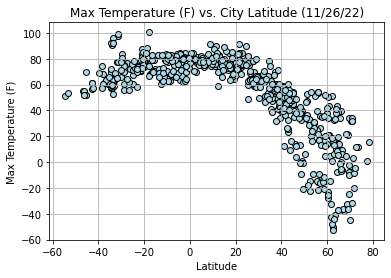

In [19]:
# Create Latitude vs. Max Temperature Plot
tempScatter = plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], facecolor="lightblue", edgecolor = "black")
plt.title("Max Temperature (F) vs. City Latitude (11/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-')
plt.savefig("../output_data/lat_temp.png")

print("Max Temperature (F) vs. City Latitude: The further away cities are from the equator, the max temperature decreases. "
     "Cities closer to the equator display higher max temperatures.")

## Latitude vs. Humidity Plot

Humidity (%) vs Latitude: At this time of year, most countries are 60% or greater in humidity.


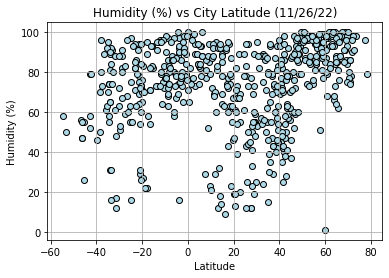

In [20]:
# Create Latitude vs. Humidity Plot
humidityScatter = plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], facecolor="lightblue", edgecolor = "black")
plt.title("Humidity (%) vs City Latitude (11/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-')
plt.savefig("../output_data/lat_humidity.png")

print("Humidity (%) vs Latitude: At this time of year, most countries are 60% or greater in humidity.")

## Latitude vs. Cloudiness Plot

Cloudiness vs. City Latitude: A majority of cities north of the equator are experiencing 60% cloudiness or higher.


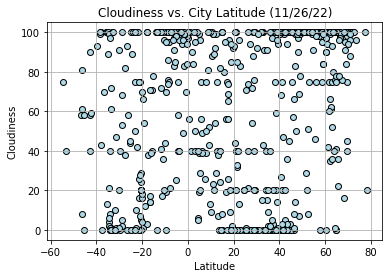

In [21]:
# Create Latitude vs. Cloudiness
cloudScatter = plt.scatter(weatherDF["Lat"], weatherDF["Cloudiness"], facecolor="lightblue", edgecolor = "black")
plt.title("Cloudiness vs. City Latitude (11/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-')
plt.savefig("../output_data/lat_cloud.png")

print("Cloudiness vs. City Latitude: A majority of cities north of the equator are experiencing 60% cloudiness or higher.")


## Latitude vs. Wind Speed Plot

Wind Speed vs Latitude: At this time of year, a majority of cities are experiencing wind speed 10 mph or less.


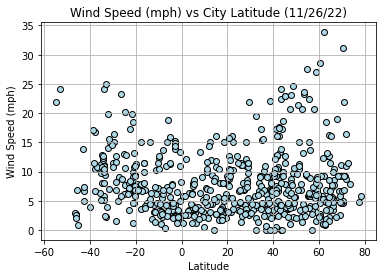

In [22]:
# Create Latitude vs. Wind Speed
windScatter = plt.scatter(weatherDF["Lat"], weatherDF["Wind Speed"], facecolor="lightblue", edgecolor = "black")
plt.title("Wind Speed (mph) vs City Latitude (11/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-')
plt.savefig("../output_data/lat_windspeed.png")

print("Wind Speed vs Latitude: At this time of year, a majority of cities are experiencing wind speed 10 mph or less.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# Seperate DF into North and South Hempispheres lats

north_hemX = weatherDF.loc[(weatherDF['Lat'] >= 0)]
south_hemX = weatherDF.loc[(weatherDF['Lat'] < 0)]

The r-value is: 0.69


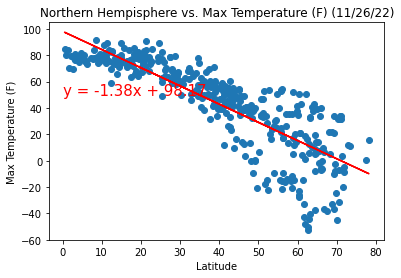

In [24]:
# Seperate DF into North and South Hempispheres lats

north_hemX = weatherDF.loc[(weatherDF['Lat'] >= 0)]
south_hemX = weatherDF.loc[(weatherDF['Lat'] < 0)]
# Set x and y axis for North Hemp Lat v Max Temp
NtempLatX = north_hemX['Lat']
NtempY = north_hemX['Max Temp']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Ntemp_slope, Ntemp_intercept, Ntemp_rvalue, pvalue, stderr) = linregress(NtempLatX, NtempY)
Ntemp_regress_values = NtempLatX * Ntemp_slope + Ntemp_intercept
Ntemp_line_eq = "y = " + str(round(Ntemp_slope,2)) + "x + " + str(round(Ntemp_intercept,2))

plt.scatter(NtempLatX, NtempY)
plt.plot(NtempLatX,Ntemp_regress_values,"r-")
plt.annotate(Ntemp_line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hempisphere vs. Max Temperature (F) (11/26/22)")

print(f"The r-value is: {Ntemp_rvalue**2:.2f}")
plt.savefig("../output_data/north_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.19
North Hemisphere vs Max Temp has a strong negative correlation. Cities north of the latitude, display decreasing max temperatures. The data and r-value confirms the prediction made by the linear regression line.
South Hemisphere vs. Max Temp has a strong positive correlation. Cities closer to the latitude have higher max temperatures. Data confirms the linear regression line, as cities get closer to the equator,, max temperature is increased.


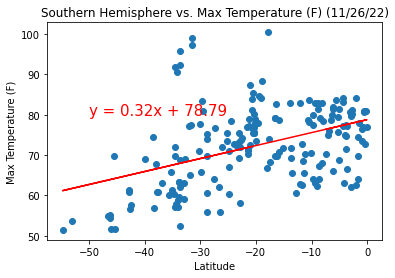

In [25]:
# Set x and y axis for South Hemp Lat v Max Temp
StempLatX = south_hemX['Lat']
StempY = south_hemX['Max Temp']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Stemp_slope, Stemp_intercept, Stemp_rvalue, pvalue, stderr) = linregress(StempLatX, StempY)
Stemp_regress_values = StempLatX * Stemp_slope + Stemp_intercept
Stemp_line_eq = "y = " + str(round(Stemp_slope,2)) + "x + " + str(round(Stemp_intercept,2))

plt.scatter(StempLatX, StempY)
plt.plot(StempLatX,Stemp_regress_values,"r-")
plt.annotate(Stemp_line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere vs. Max Temperature (F) (11/26/22)")

print(f"The r-value is: {Stemp_rvalue**2:.2f}")
print("North Hemisphere vs Max Temp has a strong negative correlation. Cities north of the latitude, display "
      "decreasing max temperatures. The data and r-value confirms the prediction made by the linear regression line.\n"
     "South Hemisphere vs. Max Temp has a strong positive correlation. Cities closer to the latitude have higher max "
     "temperatures. Data confirms the linear regression line, as cities get closer to the equator,, max temperature is "
     "increased.")


plt.savefig("../output_data/south_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11


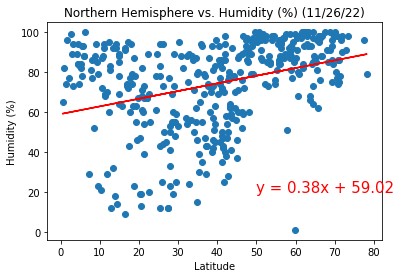

In [28]:
# Set x and y axis for North Hemp Lat v Humidity
NhumidLatX = north_hemX['Lat']
NhumidY = north_hemX['Humidity']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Nhumid_slope, Nhumid_intercept, Nhumid_rvalue, pvalue, stderr) = linregress(NhumidLatX, NhumidY)
Nhumid_regress_values = NhumidLatX * Nhumid_slope + Nhumid_intercept
Nhumid_line_eq = "y = " + str(round(Nhumid_slope,2)) + "x + " + str(round(Nhumid_intercept,2))

plt.scatter(NhumidLatX, NhumidY)
plt.plot(NhumidLatX,Nhumid_regress_values,"r-")
plt.annotate(Nhumid_line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere vs. Humidity (%) (11/26/22)")

print(f"The r-value is: {Nhumid_rvalue**2:.2f}")
plt.savefig("../output_data/north_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12
Both northern and southern vs humidity plots have no correlation. The linear regression line does not predict humidity forecast.


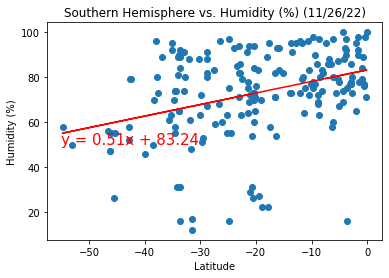

In [31]:
# Set x and y axis for Sorth Hemp Lat v Humidity
ShumidLatX = south_hemX['Lat']
ShumidY = south_hemX['Humidity']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Shumid_slope, Shumid_intercept, Shumid_rvalue, pvalue, stderr) = linregress(ShumidLatX, ShumidY)
Shumid_regress_values = ShumidLatX * Shumid_slope + Shumid_intercept
Shumid_line_eq = "y = " + str(round(Shumid_slope,2)) + "x + " + str(round(Shumid_intercept,2))

plt.scatter(ShumidLatX, ShumidY)
plt.plot(ShumidLatX,Shumid_regress_values,"r-")
plt.annotate(Shumid_line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere vs. Humidity (%) (11/26/22)")

print(f"The r-value is: {Shumid_rvalue**2:.2f}")

print("Both northern and southern vs humidity plots have no correlation. The linear regression line does not predict "
     "humidity forecast.")

plt.savefig("../output_data/south_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10


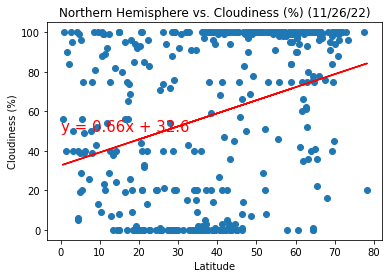

In [32]:
# Set x and y axis for North Hemp Lat v Cloudiness (%)
NcloudLatX = north_hemX['Lat']
NcloudY = north_hemX['Cloudiness']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Ncloud_slope, Ncloud_intercept, Ncloud_rvalue, pvalue, stderr) = linregress(NcloudLatX, NcloudY)
Ncloud_regress_values = NcloudLatX * Ncloud_slope + Ncloud_intercept
Ncloud_line_eq = "y = " + str(round(Ncloud_slope,2)) + "x + " + str(round(Ncloud_intercept,2))

plt.scatter(NcloudLatX, NcloudY)
plt.plot(NcloudLatX,Ncloud_regress_values,"r-")
plt.annotate(Ncloud_line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere vs. Cloudiness (%) (11/26/22)")

print(f"The r-value is: {Ncloud_rvalue**2:.2f}")
plt.savefig("../output_data/north_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15
Both northern and southern hemisphere vs cloudiness have no correlation. r-value = 0 essentially. The linear regression line does not predict the forecast for chance of cloudiness in this case.


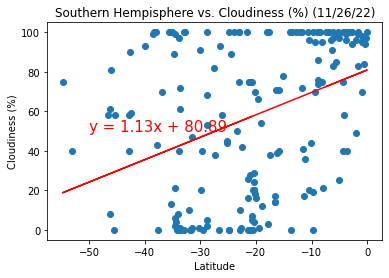

In [34]:
# Set x and y axis for South Hemp Lat v Cloudiness (%)
ScloudLatX = south_hemX['Lat']
ScloudY = south_hemX['Cloudiness']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Scloud_slope, Scloud_intercept, Scloud_rvalue, pvalue, stderr) = linregress(ScloudLatX, ScloudY)
Scloud_regress_values = ScloudLatX * Scloud_slope + Scloud_intercept
Scloud_line_eq = "y = " + str(round(Scloud_slope,2)) + "x + " + str(round(Scloud_intercept,2))

plt.scatter(ScloudLatX, ScloudY)
plt.plot(ScloudLatX,Scloud_regress_values,"r-")
plt.annotate(Scloud_line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hempisphere vs. Cloudiness (%) (11/26/22)")

print(f"The r-value is: {Scloud_rvalue**2:.2f}")

print("Both northern and southern hemisphere vs cloudiness have no correlation. r-value = 0 essentially. The linear regression line "
     "does not predict the forecast for chance of cloudiness in this case.")
plt.savefig("../output_data/south_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02


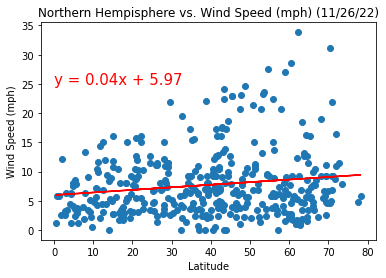

In [35]:
# Set x and y axis for North Hemp Lat v Max Temp
NwindLatX = north_hemX['Lat']
NwindY = north_hemX['Wind Speed']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Nwind_slope, Nwind_intercept, Nwind_rvalue, pvalue, stderr) = linregress(NwindLatX, NwindY)
Nwind_regress_values = NwindLatX * Nwind_slope + Nwind_intercept
Nwind_line_eq = "y = " + str(round(Nwind_slope,2)) + "x + " + str(round(Nwind_intercept,2))

plt.scatter(NwindLatX, NwindY)
plt.plot(NwindLatX,Nwind_regress_values,"r-")
plt.annotate(Nwind_line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hempisphere vs. Wind Speed (mph) (11/26/22)")

print(f"The r-value is: {Nwind_rvalue**2:.2f}")
plt.savefig("../output_data/north_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09
Both northern and southern hemisphere vs wind speed have no correlation. r-value = 0 essentially. The linear regression line does not predict the forecast for wind speed in this scenario.


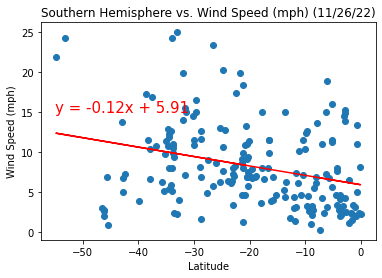

In [36]:
# Set x and y axis for North Hemp Lat v Max Temp
SwindLatX = south_hemX['Lat']
SwindY = south_hemX['Wind Speed']

# Calculate and plot linear regress for North Hemp. v Max Temp
(Swind_slope, Swind_intercept, Swind_rvalue, pvalue, stderr) = linregress(SwindLatX, SwindY)
Swind_regress_values = SwindLatX * Swind_slope + Swind_intercept
Swind_line_eq = "y = " + str(round(Swind_slope,2)) + "x + " + str(round(Swind_intercept,2))

plt.scatter(SwindLatX, SwindY)
plt.plot(SwindLatX,Swind_regress_values,"r-")
plt.annotate(Swind_line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere vs. Wind Speed (mph) (11/26/22)")

print(f"The r-value is: {Swind_rvalue**2:.2f}")

print("Both northern and southern hemisphere vs wind speed have no correlation. r-value = 0 essentially. The linear regression line "
     "does not predict the forecast for wind speed in this scenario.")

plt.savefig("../output_data/south_windspeed.png")